<h1>Used Car Price Prediction Dataset

<h2>Objective

In this practical exercise, our task is to build and implement a support vector regressor (SVR) model that predicts the price of a used car based on various features.

<h2>About Dataset

Used Car Price Prediction Dataset is a comprehensive collection of automotive information extracted from the popular automotive marketplace website, https://www.cars.com. This dataset comprises 4,009 data points, each representing a unique vehicle listing, and includes nine distinct features providing valuable insights into the world of automobiles.

<h2>Machine Learning Workflow

1) Loading the Dataset<br>
2) Exploratary data analysis<br>
3) Data preprocessing <br>
4) Model selection<br>
5) Training the model<br>
6) Evaluate the model<br>
7) Fine-tune the model using gridsearchcv to find the best combination paramters for SVR. (if needed)


<h3>Import Necessary Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, learning_curve
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,OrdinalEncoder

from sklearn.linear_model import LinearRegression

from datetime import date

import warnings
warnings.filterwarnings("ignore")

<h3>Loading Dataset

In [99]:
data=pd.read_csv("./data/used_cars.csv")

In [100]:
#Display first 5 rows
data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [101]:
#Display last 5 rows
data.tail()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"
4008,BMW,X3 xDrive30i,2020,"43,000 mi.",Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000"


In [102]:
#Get information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


We have one numerical variable, and the rest are categorical variables. We must encode the categorical variables to convert them into numerical format. Additionally, the `fuel_type`, `accident`, and `clean_title` variables contain null values.

In [103]:
#Display number of rows and column
data.shape

(4009, 12)

There are 4009 observations and 12 features in our dataset

<h3>Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing datasets to understand their main characteristics. It involves summary statistics, identifying missing values and duplicates, detecting patterns, understanding relationships between variables, and using data visualization to reveal the underlying structure of the data.<br>

The goal of EDA is to gain meaningful insights from the dataset. In addition, EDA is a cornerstone of data science and plays a critical role in building effective machine learning models.



In [104]:
# Check for missing values
data.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [105]:
#Calculate the percentage of missing values in each column
round((data.isnull().sum()/len(data))*100,2)

brand            0.00
model            0.00
model_year       0.00
milage           0.00
fuel_type        4.24
engine           0.00
transmission     0.00
ext_col          0.00
int_col          0.00
accident         2.82
clean_title     14.87
price            0.00
dtype: float64

In [106]:
#check number of unique value for each column
data.nunique()

brand             57
model           1898
model_year        34
milage          2818
fuel_type          7
engine          1146
transmission      62
ext_col          319
int_col          156
accident           2
clean_title        1
price           1569
dtype: int64

In [107]:
#check for summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,4009.0,2015.51559,6.104816,1974.0,2012.0,2017.0,2020.0,2024.0


<b>Note:</b> By default, describe() only summarizes numerical variables. To include categorical variables as well, use the argument include="all".

In [108]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,4009,57,Ford,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,4009,1898,M3 Base,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_year,4009.0,NaN,NaN,NaN,2015.51559,6.104816,1974.0,2012.0,2017.0,2020.0,2024.0
milage,4009,2818,"110,000 mi.",16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,3839,7,Gasoline,3309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,4009,1146,2.0L I4 16V GDI DOHC Turbo,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,4009,62,A/T,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ext_col,4009,319,Black,905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_col,4009,156,Black,2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accident,3896,2,None reported,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
#check for all brand name are written correctly
data["brand"].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [110]:
data.transmission.nunique()

62

Before we do EDA, lets separate Numerical and categorical variables for easy analysis

In [111]:
categorical_variable=data.select_dtypes("object").columns

numerical_variable=data.select_dtypes(["int","float"]).columns

In [112]:
print(f"Categroical Variables are: {[*categorical_variable]}")
print(f"Numerical Variables are: {[*numerical_variable]}")

Categroical Variables are: ['brand', 'model', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
Numerical Variables are: ['model_year']


<h4>EDA Univariate Analysis

Analyzing/Visualizing one variable in the dataset at a time 

<Axes: xlabel='accident', ylabel='count'>

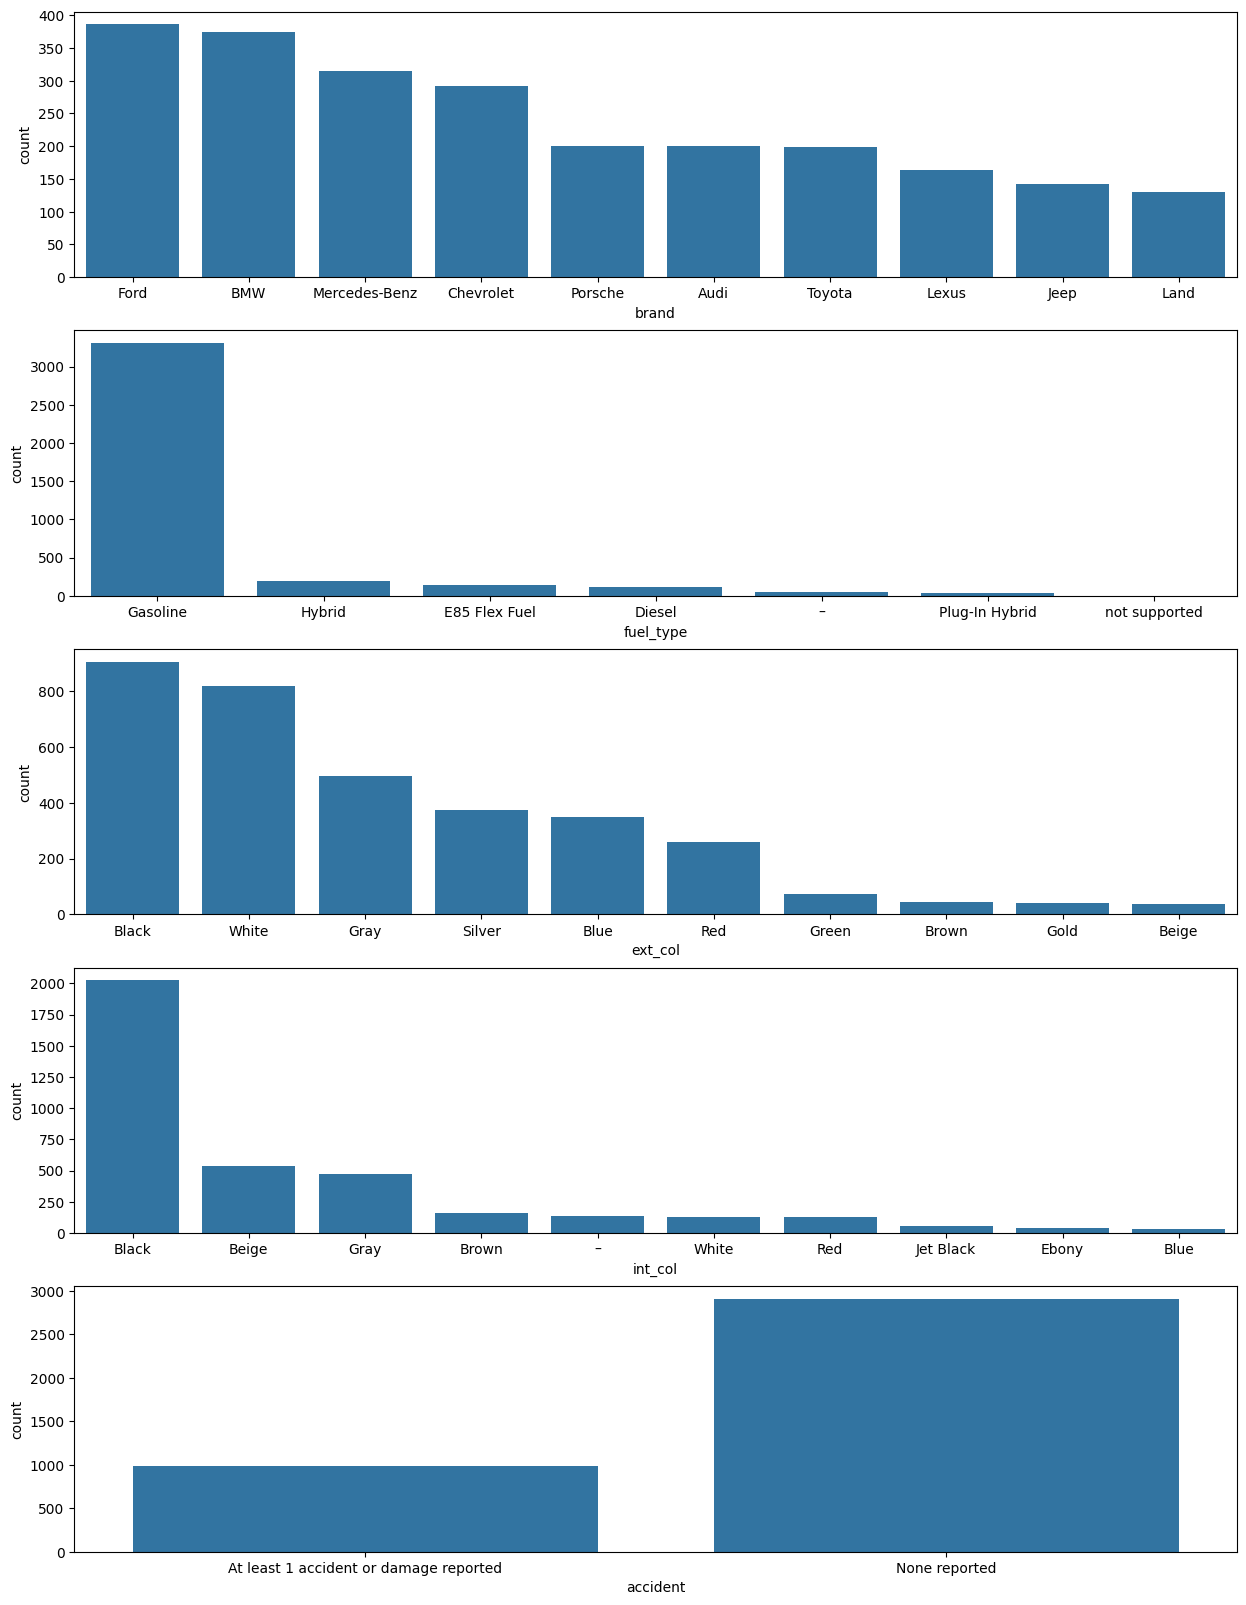

In [113]:
#Distribution for Categorical Variables
fig, ax=plt.subplots(5,1,figsize=(15,20))

sns.countplot(x="brand",data=data,ax=ax[0],order=data["brand"].value_counts().head(10).index)

sns.countplot(x="fuel_type",data=data,ax=ax[1],order=data["fuel_type"].value_counts().index)

sns.countplot(x="ext_col",data=data,ax=ax[2],order=data["ext_col"].value_counts().head(10).index)

sns.countplot(x="int_col",data=data,ax=ax[3],order=data["int_col"].value_counts().head(10).index)

sns.countplot(x="accident",data=data,ax=ax[4])





Text(0.5, 1.0, 'Distribution of Car Brands')

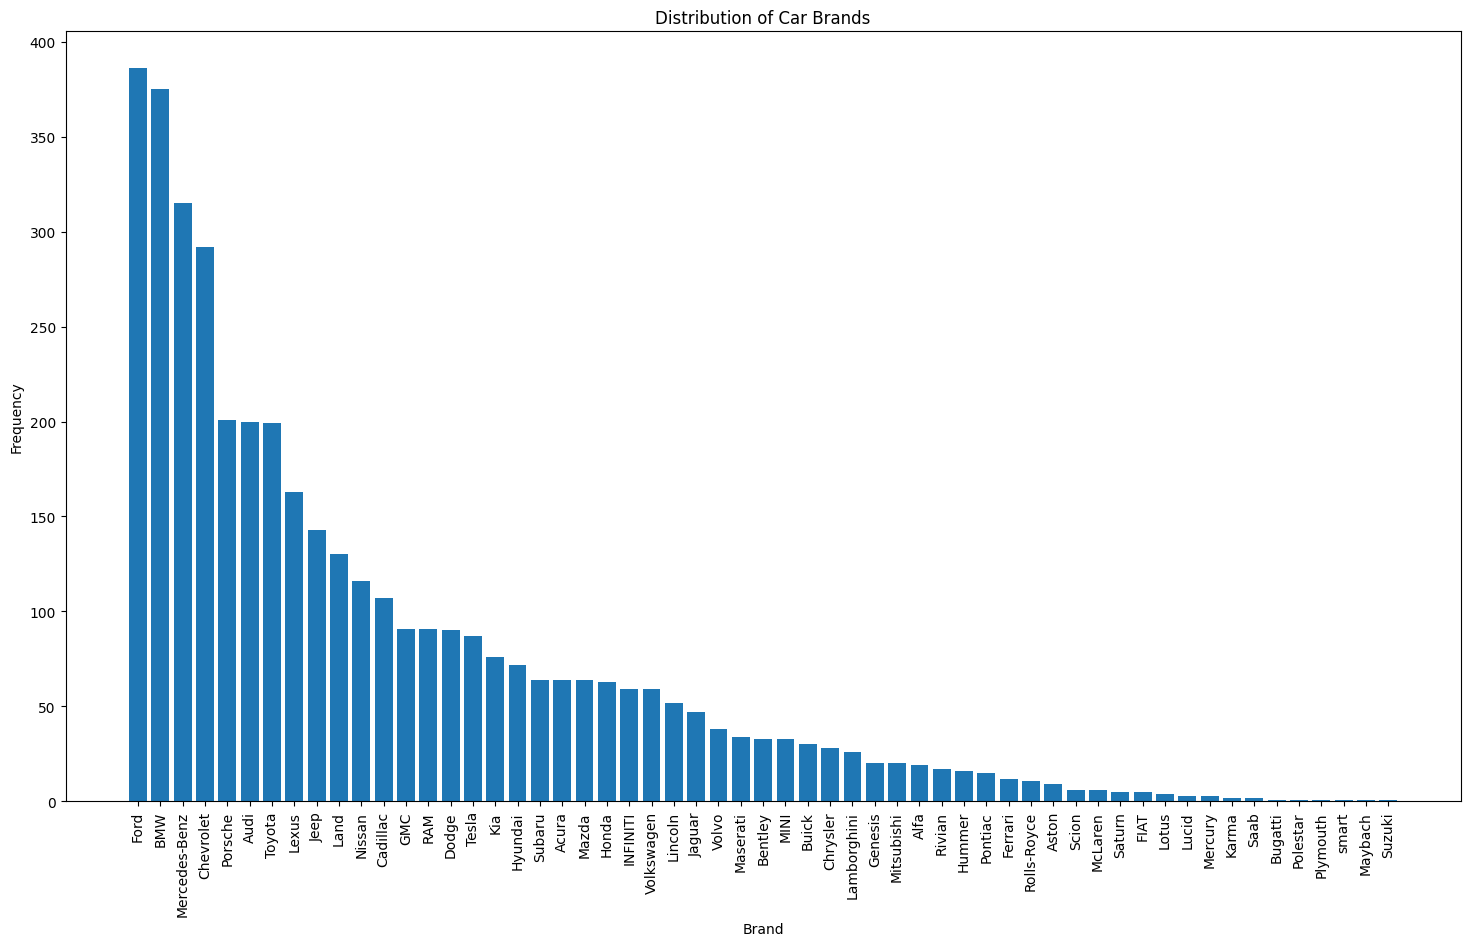

In [114]:
plt.figure(figsize=(18,10))
brand_count=data.brand.value_counts()
plt.bar(brand_count.index,brand_count)
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Brand")
plt.title("Distribution of Car Brands")

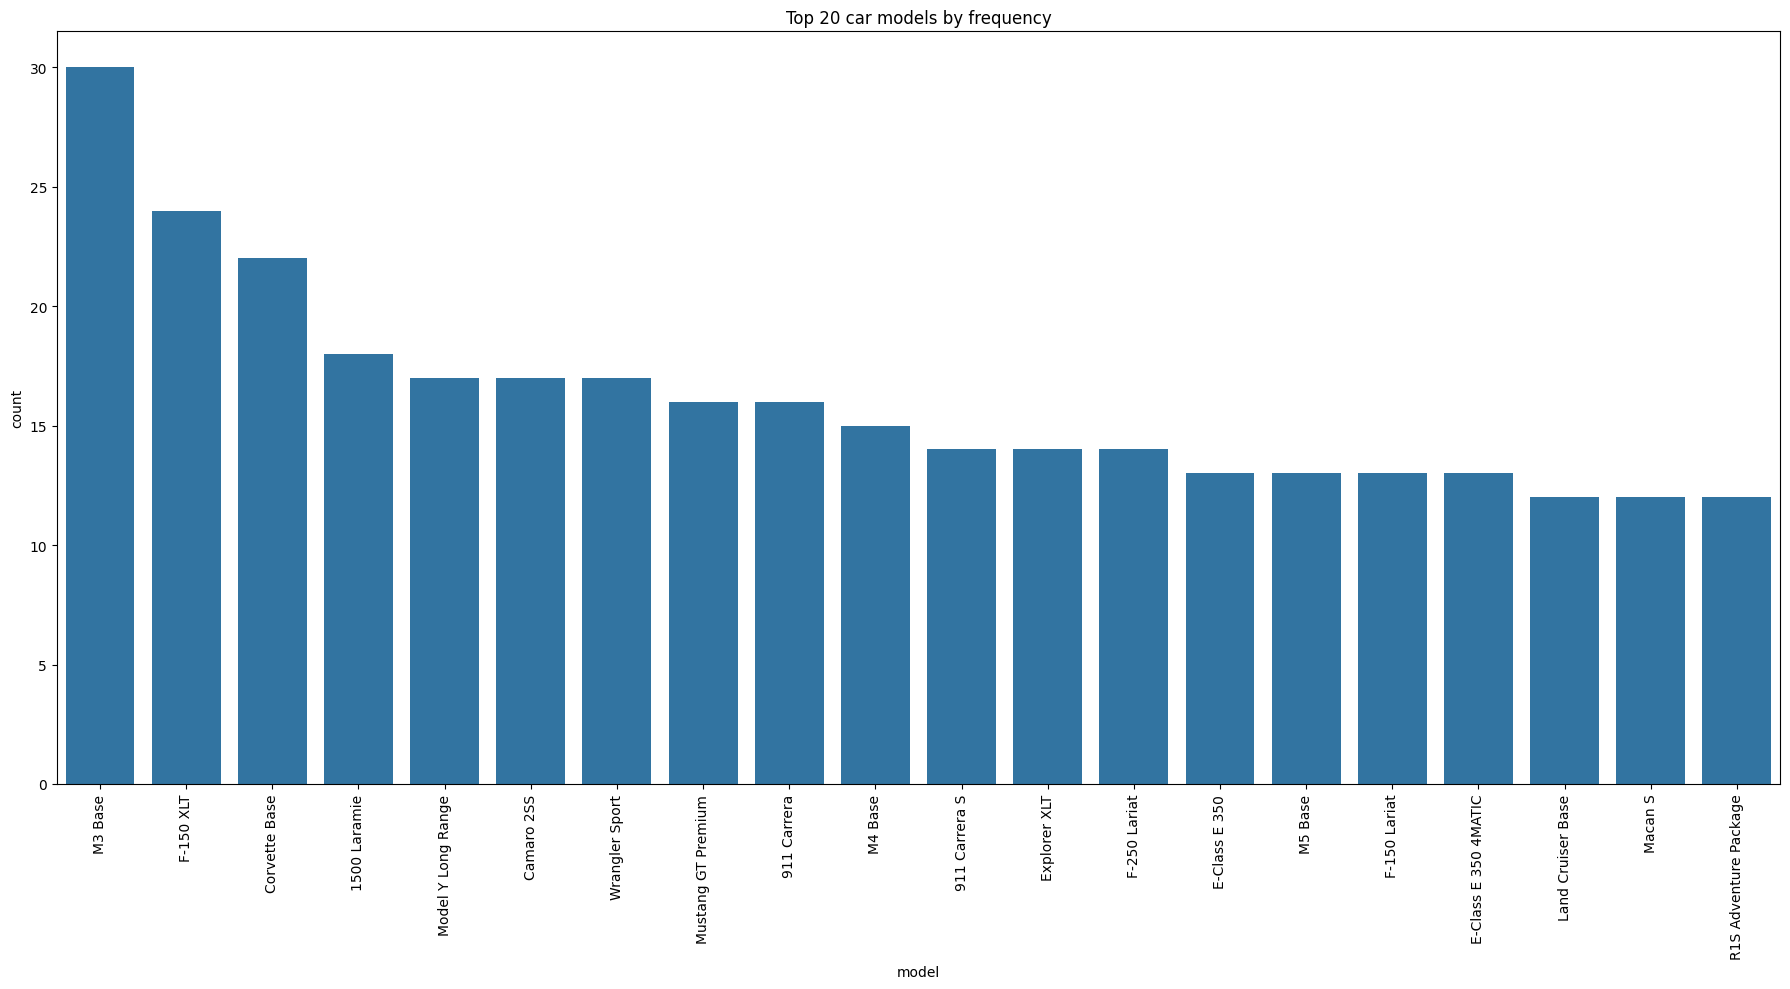

In [115]:
#Display top 20 car models
plt.figure(figsize=(18,10))
sns.countplot(x="model",data=data,order=data["model"].value_counts()[:20].index)
plt.title("Top 20 car models by frequency")
plt.xticks(rotation=90)
plt.tight_layout()

Text(0.5, 1.0, 'Distrinution of model_year')

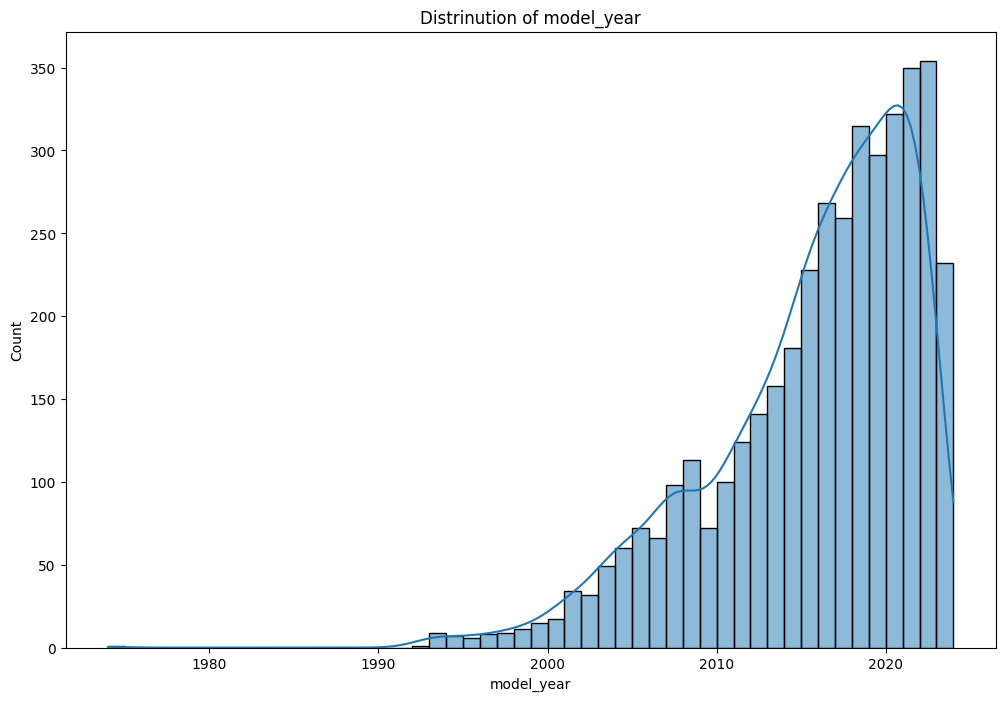

In [116]:
#Distribution for Numerical Variables except price
fig,ax=plt.subplots(1,1,figsize=(12,8))

sns.histplot(x=data[numerical_variable[0]],data=data,kde=True)
plt.title(f"Distrinution of {numerical_variable[0]}")

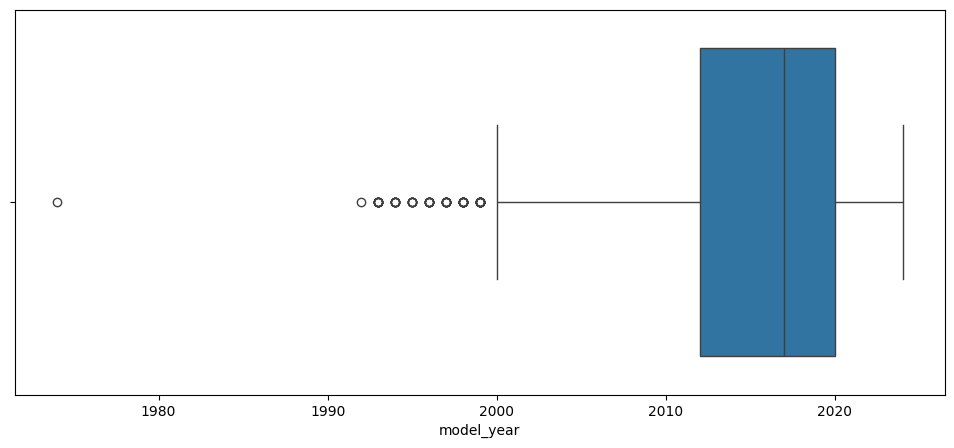

In [117]:
#Detecting outliers using boxplot

fig,ax=plt.subplots(1,1,figsize=(12,5))

for i in range(len(numerical_variable)):
    plt.subplot(1,1,i+1)
    sns.boxplot(x=data[numerical_variable[i]],data=data)

<h3>EDA Summary

* Identified missing values in fuel_type, accident, and clean_title.
* Three missing value strategies: drop rows, impute (mean/median/mode), or use ML (e.g., KNN).
* Chose mode imputation since these are categorical features.
* Dataset requires preprocessing before modeling.
* Contains 11 categorical variables → encoding needed based on data type.
* price and mileage stored incorrectly as categorical → converted to correct numerical types.
* fuel_type and accident have mixed types (object/float) → converted to string for consistency.
* Most frequent brand: Ford, followed by BMW.
* Most vehicles use Diesel fuel.
* transmission, internal_color, and external_color have many unique values.
* Created transmission_type feature: grouped as “Automatic” or “Manual”.
* Created matching_color feature: 1 if internal color matches external, else 0.
* Placeholder values like "Unknown" treated as missing and imputed.
* Used IQR method to define and remove outliers in numerical columns.
* Transformed model_year into vehicle_age by subtracting from the current year

<h3>Data Preprocessing

<b>Data Cleaning

In [118]:
data["fuel_type"]=data["fuel_type"].replace(["–","not supported"],np.nan)

In [119]:
data["fuel_type"].fillna(data["fuel_type"].mode()[0],inplace=True)
data["accident"].fillna(data["accident"].mode()[0],inplace=True)
data["clean_title"].fillna("No",inplace=True)

In [120]:
data.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [121]:
# Create new Feature named 'milage_int'
# Contains Milage converted to int dtype 
def return_milage_int(s):
    d=int(s.replace(",","").replace("mi.",""))
    return d

data["milage_int"]=data["milage"].map(return_milage_int)

data.drop("milage",axis=1,inplace=True)

In [122]:
# Create new Fature named 'price_int'
# Contains Price converted to int dtype 
def return_price_int(s):
    d= int(s.replace("$","").replace(",",""))
    return d
data["price_int"]=data["price"].apply(return_price_int)
data.drop("price",axis=1,inplace=True)

<b>Feature Engineering

Feature engineering is the process of creating new features or transforming existing ones to improve the performance of machine learning models. The main goal is to extract meaningful information from raw data by applying domain knowledge, mathematical transformations, or encoding techniques.

* The mmain goal of Feature engineering is to create meaningful data from raw data

In [123]:
current_year=date.today().year
data["car_age"]=current_year-data["model_year"]
data.head()

,brand,model,model_year,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,milage_int,price_int,car_age
0,Ford,Utility Police Interceptor Base,2013,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,51000,10300,12
1,Hyundai,Palisade SEL,2021,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,34742,38005,4
2,Lexus,RX 350 RX 350,2022,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,22372,54598,3
3,INFINITI,Q50 Hybrid Sport,2015,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,88900,15500,10
4,Audi,Q3 45 S line Premium Plus,2021,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,9835,34999,4


<b>Transmission:</b> Determine the transmission type, whether automatic, manual, or another variant.

In [124]:
def transmission_transformation(value):
     value = value.lower()
     if ("at" in value)or("a/t" in value) or ("automatic" in value) or ("transmission w/dual shift mode" in value) or ("auto" in value) or ("cvt" in value):
        return "Automatic"
     elif ("mt"in value) or("m/t" in value) or ("manual" in value):
        return "Manual"
     else:
        return "Other"
#Apply function to each value in the 'price' column
data["transmission"]=data["transmission"].apply(transmission_transformation)

In [125]:
data.transmission.value_counts()

transmission
Automatic    3612
Manual        373
Other          24
Name: count, dtype: int64

If the car has the same interior and exterior color, we will assign it as 'Same'; otherwise, it will be assigned as 'Different'.

In [126]:
#change clean title to numeric
def change_clean_title(clean_title):
    if clean_title=="Yes":
        return 1
    else:
        return 0
data["clean_title"]=data["clean_title"].map(change_clean_title)

In [127]:
def matching_color(data):
    if data["ext_col"] == data["int_col"]:
        return 1
    else:
        return 0
data["color_match"]=data.apply(matching_color,axis=1)

In [128]:
#change #change accident data into nuemric using lambda function

data["accident"]=data["accident"].apply(lambda x:1 if x=="At least 1 accident or damage reported" else 0)

Before applying encoding to categorical variables, I will  perform data visualization to understand the underlying structure and detect patterns in the dataset.

In [129]:
categorical_variable=data.select_dtypes("object").columns
numerical_variable=data.select_dtypes(["int","float"]).columns

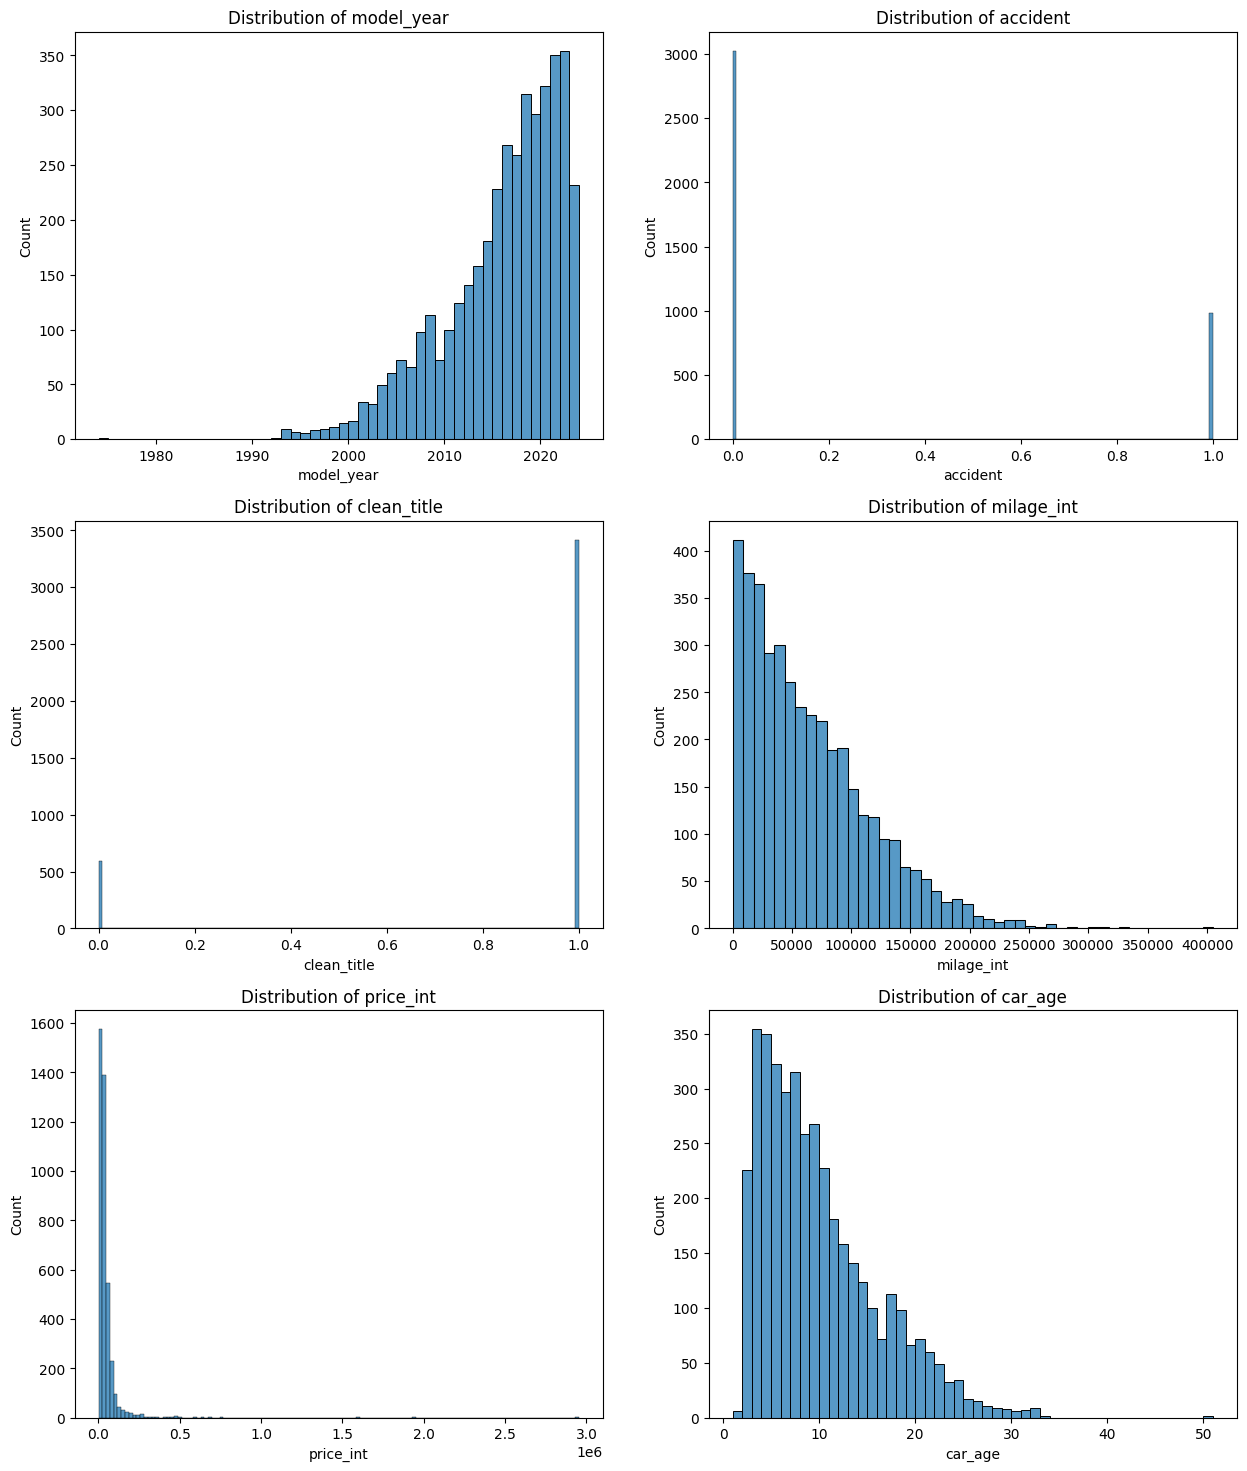

In [130]:
fig, ax=plt.subplots(3,2, figsize=(15,18))

for i in range(len(numerical_variable[1:])):
    plt.subplot(3,2,i+1)
    sns.histplot(x=data[numerical_variable[i]],data=data)
    plt.title(f"Distribution of {numerical_variable[i]}")

<b>Detecting Outliers using boxplot

<Axes: xlabel='milage_int'>

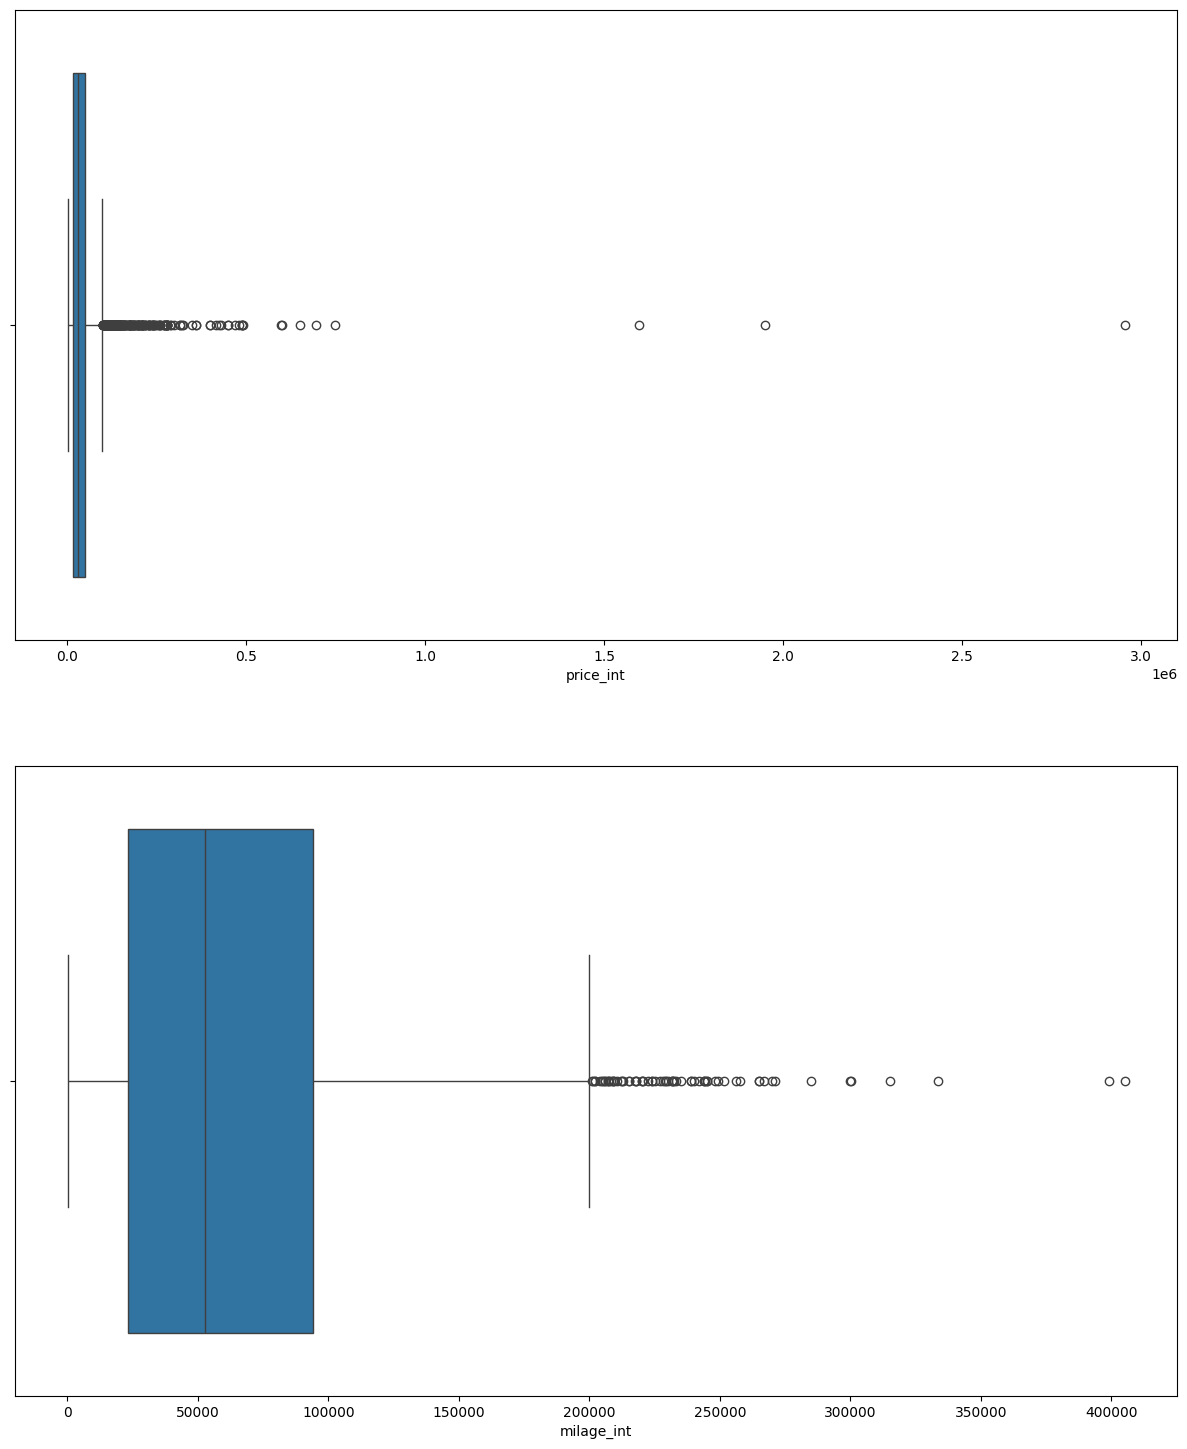

In [131]:
fig, ax=plt.subplots(2,1, figsize=(15,18))

plt.subplot(2,1,1)
sns.boxplot(x="price_int",data=data)

plt.subplot(2,1,2)
sns.boxplot(x="milage_int",data=data)



The price and mileage features contain outliers. To handle them, we should create a function to remove outliers using IQR-based filtering. Additionally, for the price feature, we can apply log transformation to reduce skewness and compress the range of extreme values. This makes the feature more suitable for modeling and improves model performance.

<b>Bivariate Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Ford'),
  Text(1, 0, 'BMW'),
  Text(2, 0, 'Mercedes-Benz'),
  Text(3, 0, 'Chevrolet'),
  Text(4, 0, 'Porsche'),
  Text(5, 0, 'Audi'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Lexus'),
  Text(8, 0, 'Jeep'),
  Text(9, 0, 'Land'),
  Text(10, 0, 'Nissan'),
  Text(11, 0, 'Cadillac'),
  Text(12, 0, 'GMC'),
  Text(13, 0, 'RAM'),
  Text(14, 0, 'Dodge'),
  Text(15, 0, 'Tesla'),
  Text(16, 0, 'Kia'),
  Text(17, 0, 'Hyundai'),
  Text(18, 0, 'Subaru'),
  Text(19, 0, 'Acura')])

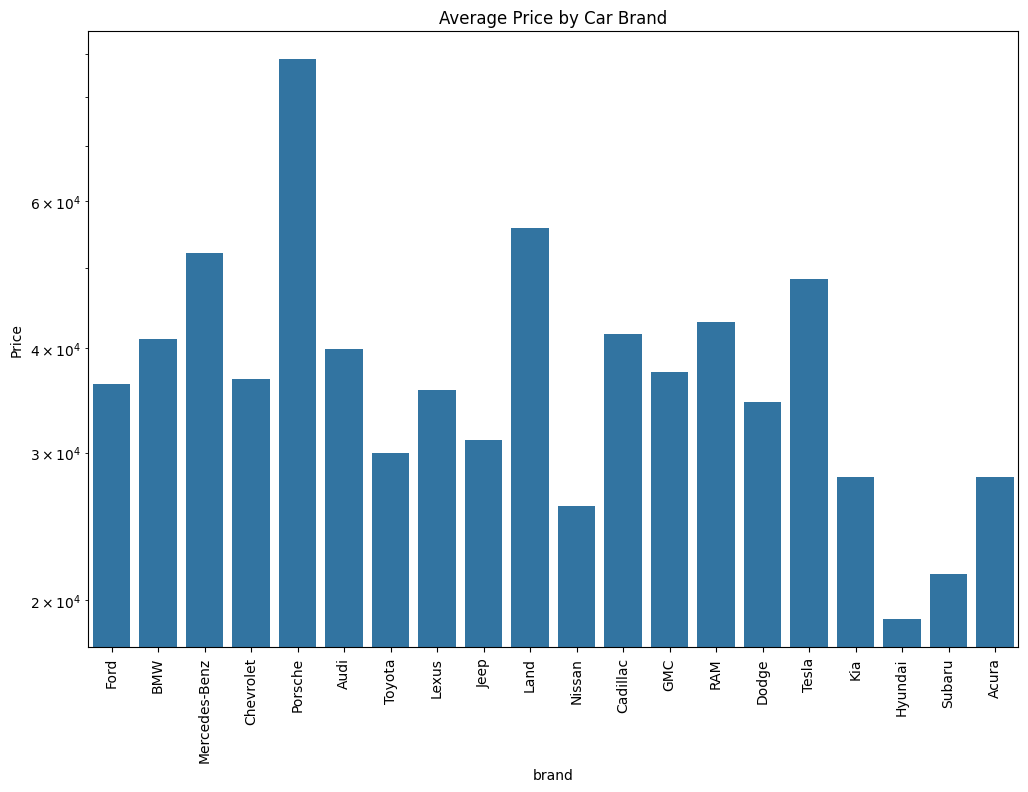

In [132]:
#Average price by car brand
plt.subplots(figsize=(12,8))
sns.barplot(x="brand",y=data["price_int"],data=data,order=data["brand"].value_counts().iloc[:20].index,errorbar=None)
plt.title("Average Price by Car Brand")
plt.ylabel("Price")
plt.yscale("log")
plt.xticks(rotation=90)

<b>Dropping unnecessary features

In [133]:
data.drop(columns=["ext_col","int_col"],inplace=True)

In [134]:
data.drop("model_year",axis=1,inplace=True)

<b>Encoding Categorical Variable

In [135]:
categorical_variable=data.select_dtypes("object").columns
categorical_variable

Index(['brand', 'model', 'fuel_type', 'engine', 'transmission'], dtype='object')

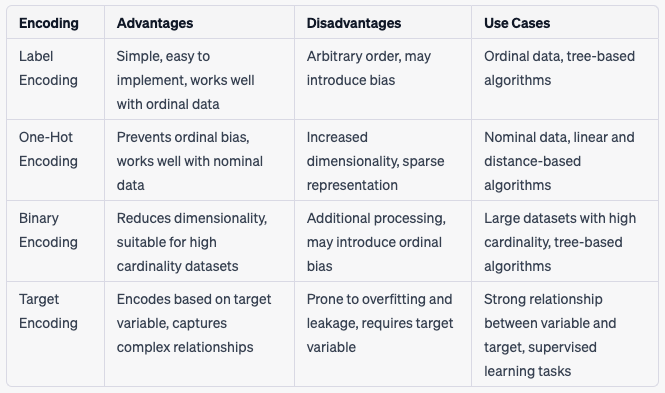

In [136]:
# Applying LabelEncoder to convert each unique category into a unique integer
label=LabelEncoder()

for cat in categorical_variable:
    data[cat]=label.fit_transform(data[cat])


In [137]:
# Apply log transformation on the 'price' feature to reduce skewness and compress outliers and to improve the performance
data["price_log"]=np.log(data["price_int"])
data.drop("price_int",axis=1,inplace=True)

<Axes: xlabel='price_log'>

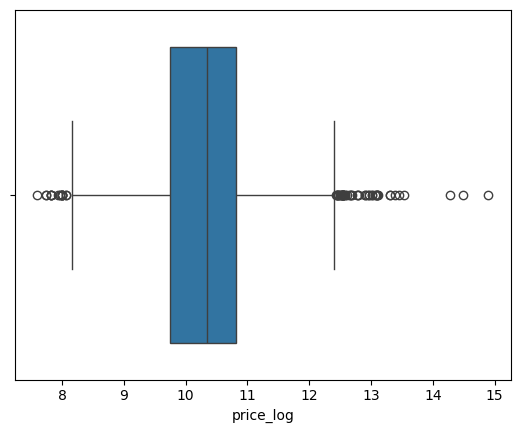

In [138]:
sns.boxplot(x="price_log",data=data)

<Axes: xlabel='price_log', ylabel='Count'>

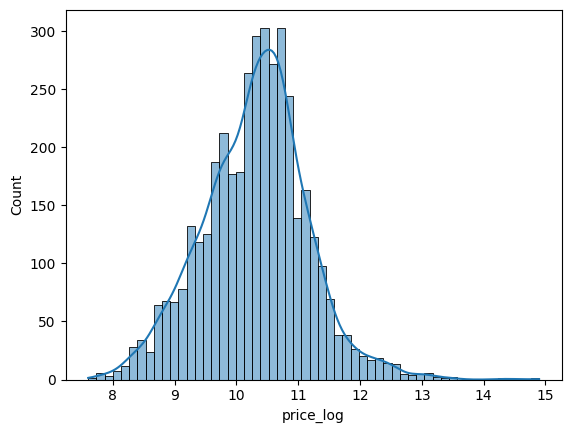

In [139]:
sns.histplot(x="price_log",data=data,kde=True)

In [140]:
#Apply IQR to detect outliers in log space and filter
def remove_outliers_iqr(df,col):
    Q1=np.percentile(df[col],25)
    Q3=np.percentile(df[col],75)

    IQR=Q3-Q1

    lower_bound= Q1-IQR*1.5
    upper_bound=Q3+IQR*1.5
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
    return df

data=remove_outliers_iqr(data,"price_log")
#data=remove_outliers_iqr(data,"milage")


<Axes: xlabel='price_log'>

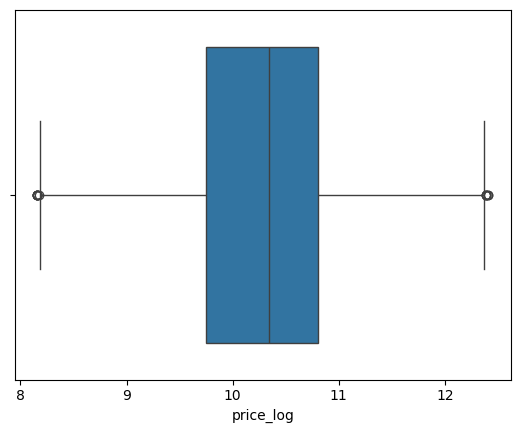

In [141]:
sns.boxplot(x="price_log",data=data)

<h3>Extract Input Feature and Target Variable

In [142]:
#Splitting the dataset
X=data.drop("price_log",axis=1)
y=data["price_log"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_test.shape,X_test.shape,y_train.shape,y_test.shape

((789, 10), (789, 10), (3154,), (789,))

In [143]:
#Data scaling
#To bring all features to the same scale, especially when they have different units or ranges.
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [144]:
#Training metrics function
def training_metrics(regressor,X_train,y_train):
    
    y_train_pred=regressor.predict(X_train)

    training_mse_score=mean_squared_error(y_train,y_train_pred)
    training_mae_score=mean_absolute_error(y_train,y_train_pred)
    score=regressor.score(X_train,y_train)

    print("Training Set Metrics")
    print("-"*30)
    print('Score: ' + str(score))
    print('MSE: ' + str(training_mse_score))
    print('MAE: ' + str(training_mae_score))
    

    print(" ")

    print("Cross Validation:")
    cv_training_score=cross_val_score(regressor,X_train,y_train,cv=5,scoring="neg_mean_squared_error")
    cv_score=np.mean(-cv_training_score)
    print(cv_score)


   

In [145]:
#Testing metrics function
def testing_metrics(regressor,X_test_scaled,y_test):
    y_pred=regressor.predict(X_test_scaled)

    mse_score=mean_squared_error(y_test,y_pred)
    mae_score=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    print("Testing Set Metrics")
    print("-"*30)
   
    print('MSE: ' + str(mse_score))
    print('MAE: ' + str(mae_score))
    print("R^2: " + str(r2))

    

<h3><h3>Training the model

In [146]:
# Initialize the SVR model
svr=SVR()

# Fit the model on the training data
svr.fit(X_train_scaled,y_train)

y_pred=svr.predict(X_test_scaled)

In [147]:
training_metrics(svr,X_train_scaled,y_train)

Training Set Metrics
------------------------------
Score: 0.8399435292538591
MSE: 0.09942778115439663
MAE: 0.22041256906277296
 
Cross Validation:
0.13085870849685327


<h3>Evaluate the model

In [148]:
testing_metrics(svr,X_test_scaled,y_test)

Testing Set Metrics
------------------------------
MSE: 0.13074118557434466
MAE: 0.26403043635958634
R^2: 0.7917040250920067


In [151]:
#To return the log-transformed predicted prices back to their original scale, we apply the exponential function.
svr_price_pred=np.exp(y_pred)
svr_price_pred[:5]

array([12146.91058878, 32372.15907251, 79281.44205687, 54175.37495803,
       21893.71349931])

We can fine-tune our model’s hyperparameters to improve performance by finding the best combination of parameter values.

<h3>Fine-Tuning SVR Model Parameters (if needed)


In [ ]:

"""
svr=SVR()

#define paramter grid
param_grid={
    "gamma":[0.001, 0.01, 0.1,1, 10,100,1000],
    "C":[0.001, 0.01, 0.1,1, 10,100,1000] ,
    'epsilon': [0.001, 0.01, 0.1, 0.5, 1,10,15,20,30,50,50] 
}

svr_grid_search=GridSearchCV(estimator=svr,
                             param_grid=param_grid,
                             cv=5,
                             scoring="neg_mean_squared_error")

svr_grid_search.fit(X_train_scaled,y_train)

"""

'\nsvr=SVR()\n\n#define paramter grid\nparam_grid={\n    "gamma":[0.001, 0.01, 0.1,1, 10,100,1000],\n    "C":[0.001, 0.01, 0.1,1, 10,100,1000] ,\n    \'epsilon\': [0.001, 0.01, 0.1, 0.5, 1,10,15,20,30,50,50] \n}\n\nsvr_grid_search=GridSearchCV(estimator=svr,\n                             param_grid=param_grid,\n                             cv=5,\n                             scoring="neg_mean_squared_error")\n\nsvr_grid_search.fit(X_train_scaled,y_train)\n\n'

<b>If a model fails to generalize well on unseen data, we begin by tuning its hyperparameters and refining features through iterative experimentation. If these adjustments don’t yield improvement, switching to a different model architecture or algorithm may be necessary

<h3>Conclusion

In this project, I built, trained, and evaluated a Support Vector Regression (SVR) model using a used car dataset. The goal was to predict the price of a used car based on its features.<br>
The workflow followed a standard machine learning pipeline. First, I loaded the dataset and conducted an initial data inspection to understand the structure, identify the features, and define the target variable (car price).<br>

Next, I performed exploratory data analysis (EDA) to gain insights into the data, including checking for missing values, analyzing summary statistics, and creating visualizations to better understand the underlying patterns and distributions.

After EDA, I applied data preprocessing techniques, which included:<br>

* Handling categorical variables using Label Encoding (assigning a unique integer to each category),

* Removing outliers to reduce noise and improve model generalization,

* And standardizing features using StandardScaler to ensure all variables were on the same scale — a critical step for SVR.

Once preprocessing was complete, I trained the SVR model, made predictions, and evaluated its performance. The model achieved an R² score of 0.7917 on the test set, indicating that approximately 79% of the variance in the target variable (used car price) is explained by the input feature

Overall, the model demonstrated solid predictive performance and represents a strong baseline for future improvements, such as hyperparameter tuning or using more advanced models like Random Forest or XGBoost.